<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('lung.csv')

In [ ]:
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [ ]:
df.describe()

,patient_id,age,pack_years
count,50000.000000,50000.000000,50000.000000
mean,124999.500000,58.857040,49.963424
std,14433.901067,23.958266,28.852082
min,100000.000000,18.000000,0.002753
25%,112499.750000,38.000000,24.774558
50%,124999.500000,59.000000,50.177634
75%,137499.250000,80.000000,75.066740
max,149999.000000,100.000000,99.999204


In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,16662
family_history,0


In [ ]:
df.duplicated().sum()

np.int64(0)

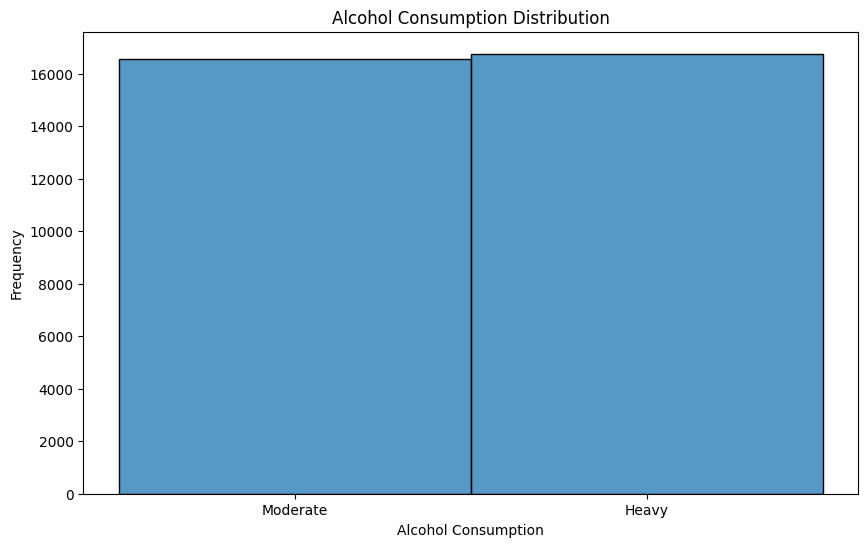

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x ='alcohol_consumption', bins = 30, kde = False )
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df_cleaned = df.copy()


In [ ]:
df_cleaned.drop_duplicates(inplace = True)
df_cleaned.dropna(inplace = True)

In [ ]:
df_cleaned.isnull().sum()

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,0
family_history,0


In [ ]:
df_cleaned.shape

(33338, 11)

In [ ]:
df_dummy = pd.get_dummies(df_cleaned, drop_first=True)

In [ ]:
df_dummy

,patient_id,age,pack_years,gender_Male,radon_exposure_Low,radon_exposure_Medium,asbestos_exposure_Yes,secondhand_smoke_exposure_Yes,copd_diagnosis_Yes,alcohol_consumption_Moderate,family_history_Yes,lung_cancer_Yes
0,100000,69,66.025244,True,False,False,False,False,True,True,False,False
1,100001,32,12.780800,False,False,False,False,True,True,True,True,True
3,100003,78,44.065232,False,True,False,False,True,False,True,False,True
5,100005,100,81.180545,True,True,False,False,True,False,True,True,True
6,100006,92,18.156752,True,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,149993,41,83.310122,True,True,False,False,True,False,True,False,False
49995,149995,81,9.386431,False,False,True,False,True,False,True,False,True
49996,149996,28,99.471718,True,False,True,False,True,False,True,False,True
49997,149997,90,14.349722,True,True,False,True,True,False,False,True,True


In [ ]:
bool_columns = df_dummy.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df_dummy[col] = df_dummy[col].astype(int)
df_dummy.head()

,patient_id,age,pack_years,gender_Male,radon_exposure_Low,radon_exposure_Medium,asbestos_exposure_Yes,secondhand_smoke_exposure_Yes,copd_diagnosis_Yes,alcohol_consumption_Moderate,family_history_Yes,lung_cancer_Yes
0,100000,69,66.025244,1,0,0,0,0,1,1,0,0
1,100001,32,12.780800,0,0,0,0,1,1,1,1,1
3,100003,78,44.065232,0,1,0,0,1,0,1,0,1
5,100005,100,81.180545,1,1,0,0,1,0,1,1,1
6,100006,92,18.156752,1,0,0,0,1,1,1,1,1


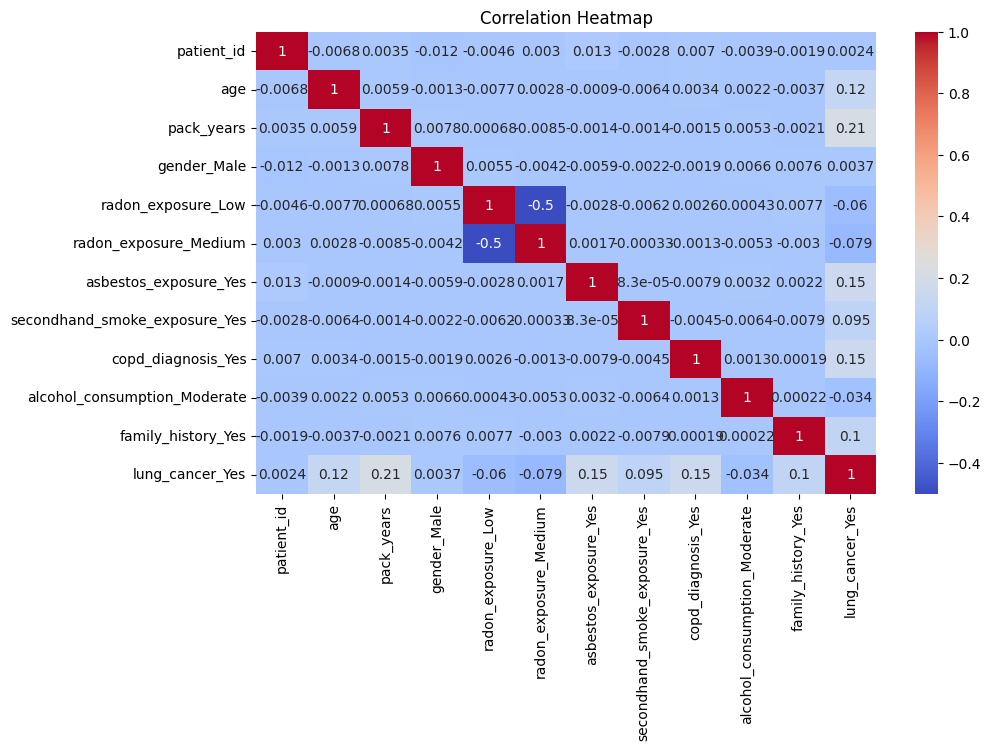

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_dummy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

numeric_columns = ['age', 'pack_years']
for col in numeric_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


print(f"Original: {df.shape[0]} rows → Cleaned: {df_cleaned.shape[0]} rows")

Original: 50000 rows → Cleaned: 33338 rows


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = df_cleaned.drop('lung_cancer', axis=1)
y = df_cleaned['lung_cancer']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
) # Added closing parenthesis here


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


model.fit(X_train,y_train)
y_pred = model.predict(X_test)
display(y_pred)

array([0.57738783, 0.7448368 , 0.70100094, ..., 0.88808358, 0.59734242,
       0.65959595])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2


0.14649953669254923

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_Score =  1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2_Score

0.14521742693844464

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

param_grids = {
    "Logistic Regression": {
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    },
    "Decision Tree Classifier": {
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    "Random Forest Classifier": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors Classifier": {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    "Support Vector Machine": {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf', 'poly']
    },
    "Naive Bayes": {}
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}


for name, model in models.items():
    print(f"\n🔍 Running Grid Search with CV for: {name}")

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    if param_grids[name]:
        grid_search = GridSearchCV(
            estimator=pipe,
            param_grid=param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"✅ Best Params: {grid_search.best_params_}")
        print(f"⭐ Best Cross-Val Accuracy (from GridSearch): {grid_search.best_score_:.3f}")
    else:

        best_model = pipe.fit(X_train, y_train)
        print("ℹ️ No hyperparameters to tune for Naive Bayes.")


    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')


    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    print(f"📊 Additional 5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"🧪 Test Accuracy: {test_acc:.3f}")
    print(f"📄 Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 80)



🔍 Running Grid Search with CV for: Logistic Regression
✅ Best Params: {'model__C': 0.1, 'model__solver': 'lbfgs'}
⭐ Best Cross-Val Accuracy (from GridSearch): 0.724
📊 Additional 5-Fold CV Accuracy: 0.724 ± 0.003
🧪 Test Accuracy: 0.731
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.33      0.42      1979
           1       0.76      0.90      0.82      4689

    accuracy                           0.73      6668
   macro avg       0.67      0.61      0.62      6668
weighted avg       0.71      0.73      0.70      6668

--------------------------------------------------------------------------------

🔍 Running Grid Search with CV for: Decision Tree Classifier
✅ Best Params: {'model__max_depth': 5, 'model__min_samples_split': 2}
⭐ Best Cross-Val Accuracy (from GridSearch): 0.733
📊 Additional 5-Fold CV Accuracy: 0.733 ± 0.005
🧪 Test Accuracy: 0.743
📄 Classification Report:
              precision    recall  f1-score   support
